# MoneySafe AI - Fraud Detection In Mobile Money & Bank Transactions




## 1. Project Setup and Importing Necessary Libraries

In [1]:
# Import essential libraries for general processing
import numpy as np
import pandas as pd

#libraries for data visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Import scikit-learn modules for preprocessing, modeling, and evaluation
# libraries for machine learning
# preprocessing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
# modelling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
#evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Set visualization style
sns.set_style('whitegrid')
%matplotlib inline

## 2. Data Loading and Initial Inspection.

  First I will load the dataset and perform an initial inspection to understand its structure, data types, and identify any immediate issues like missing values.

  I will print the first five rows to understand the structure.
  Then get a summary of the dataset to identify the data types and check for duplicate data.

In [3]:
# Load the dataset from the provided CSV file
df = pd.read_csv("/content/drive/MyDrive/paysim.csv")

# Display the first 5 rows to get a feel for the data
print("First 5 rows of the dataset:")
display(df.head())

# Get a summary of the dataframe, including data types and non-null counts
print("\nDataset Information:")
df.info()

First 5 rows of the dataset:


,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0.0,0.0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0.0,0.0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1.0,0.0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1.0,0.0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0.0,0.0



Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3141519 entries, 0 to 3141518
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         float64
 10  isFlaggedFraud  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 263.6+ MB

Missing Values Count:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    1
nameDest          1
oldbalanceDest    1
newbalanceDest    1
isFraud           1
isFlaggedFraud    1
dtype: int64


In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicate_rows}")

if duplicate_rows > 0:
    print("Dropping duplicate rows...")
    df.drop_duplicates(inplace=True)
    print(f"Number of rows after dropping duplicates: {df.shape[0]}")


Number of duplicate rows: 0


 ## Handle missing values

 Here, I identified and addressed the missing values. I chose to handle them through the deletion technique.


In [4]:
# Check for the number of missing values in each column
print("\nMissing Values Count:")
print(df.isnull().sum())

# Drop rows with missing values
df.dropna(inplace=True)

# Verify that missing values have been removed
print("\nMissing values after dropping rows:")
print(df.isnull().sum())


Missing values after dropping rows:
step              0
type              0
amount            0
nameOrig          0
oldbalanceOrg     0
newbalanceOrig    0
nameDest          0
oldbalanceDest    0
newbalanceDest    0
isFraud           0
isFlaggedFraud    0
dtype: int64


## Convert data types
I transformed categorical variables into numerical formats using
label encoding.

In [6]:
# Apply Label Encoding to the 'type' column
label_encoder = LabelEncoder()
df['type'] = label_encoder.fit_transform(df['type'])

# Drop 'nameOrig' and 'nameDest' columns due to high cardinality
df = df.drop(['nameOrig', 'nameDest'], axis=1)

# Display the first few rows of the modified DataFrame
print("DataFrame after encoding 'type' and dropping 'nameOrig' and 'nameDest':")
display(df.head())

# Display the data types to confirm changes
print("\nData types after transformations:")
df.info()

DataFrame after encoding 'type' and dropping 'nameOrig' and 'nameDest':


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0



Data types after transformations:
<class 'pandas.core.frame.DataFrame'>
Index: 3141518 entries, 0 to 3141517
Data columns (total 9 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            int64  
 2   amount          float64
 3   oldbalanceOrg   float64
 4   newbalanceOrig  float64
 5   oldbalanceDest  float64
 6   newbalanceDest  float64
 7   isFraud         float64
 8   isFlaggedFraud  float64
dtypes: float64(7), int64(2)
memory usage: 239.7 MB


## Normalize & Scale Data

In [7]:
# Separate features (X) and target (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Initialize the StandardScaler
scaler = StandardScaler()

# Fit and transform the features
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame (optional, but good for inspection)
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features
print("Scaled Features:")
display(X_scaled.head())

Scaled Features:


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud
0,-1.644093,0.962444,-0.554317,-0.230978,-0.238787,-0.432683,-0.462701,-0.000564
1,-1.644093,0.962444,-0.584106,-0.282287,-0.286744,-0.432683,-0.462701,-0.000564
2,-1.644093,1.705176,-0.590393,-0.289547,-0.293341,-0.432683,-0.462701,-0.000564
3,-1.644093,-0.523022,-0.590393,-0.289547,-0.293341,-0.423485,-0.462701,-0.000564
4,-1.644093,0.962444,-0.547487,-0.275289,-0.283170,-0.432683,-0.462701,-0.000564


# Exploratory Data Analysis (EDA)
 This includes visualizing data using histograms, scatter plots, and heatmaps, analyzing statistical properties, and identifying anomalies.

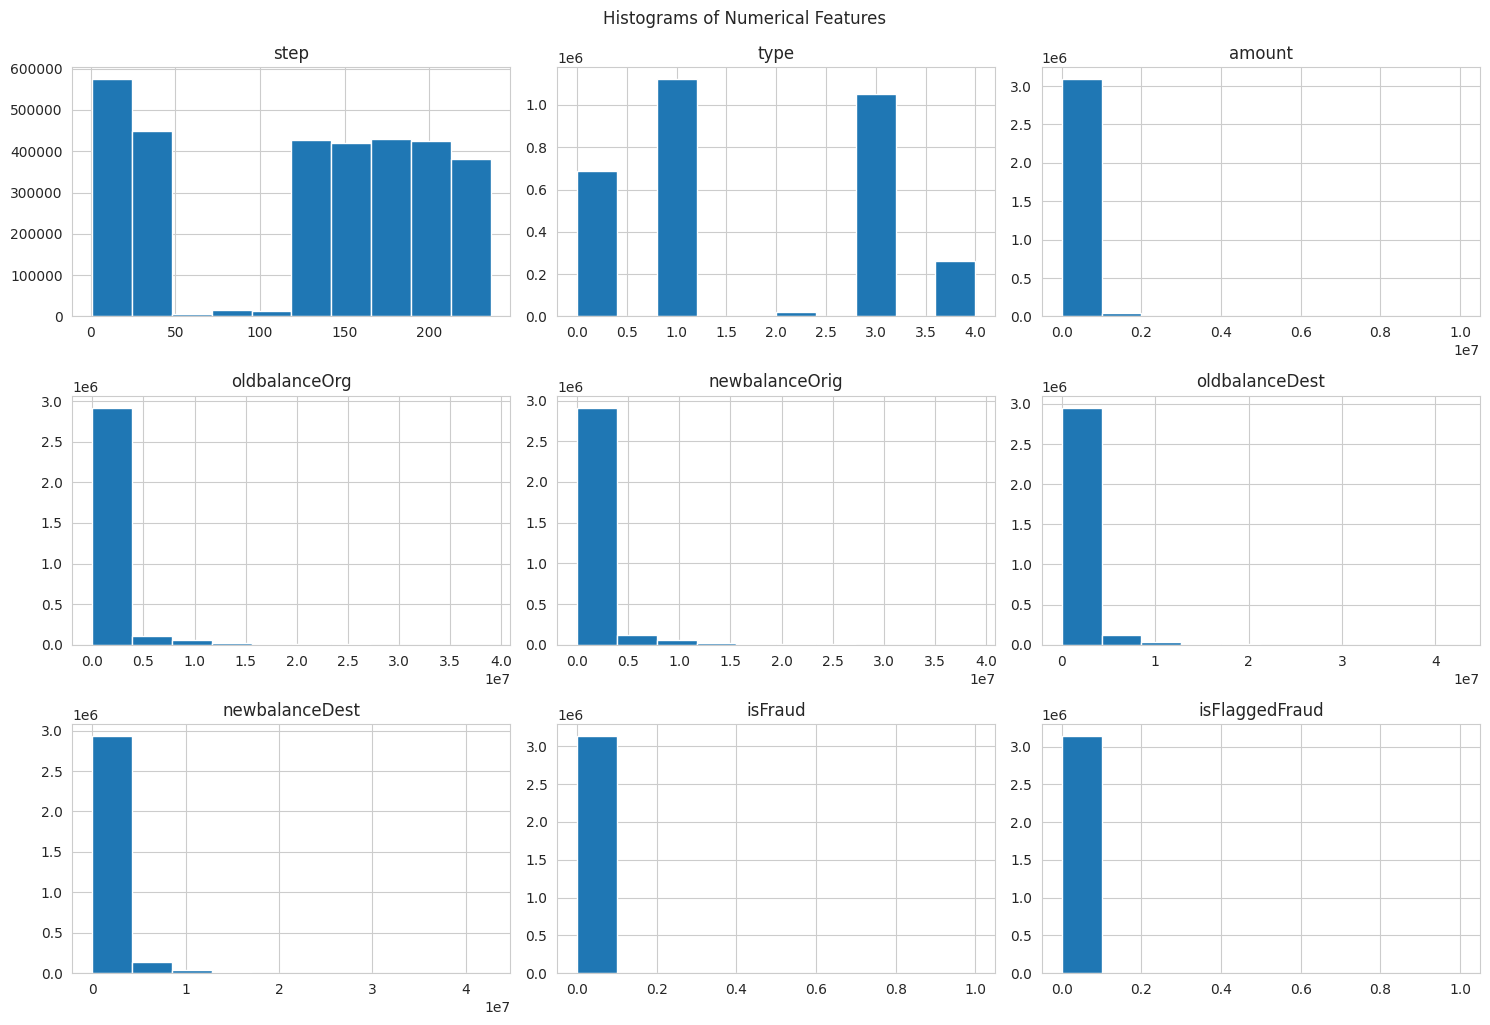

In [8]:
# Select numerical columns for histograms
numerical_cols = df.select_dtypes(include=np.number).columns

# Plot histograms for numerical columns
df[numerical_cols].hist(figsize=(15, 10))
plt.tight_layout()
plt.suptitle('Histograms of Numerical Features', y=1.02)
plt.show()

Scatter plots to examine the relationships between amount and the balance columns.



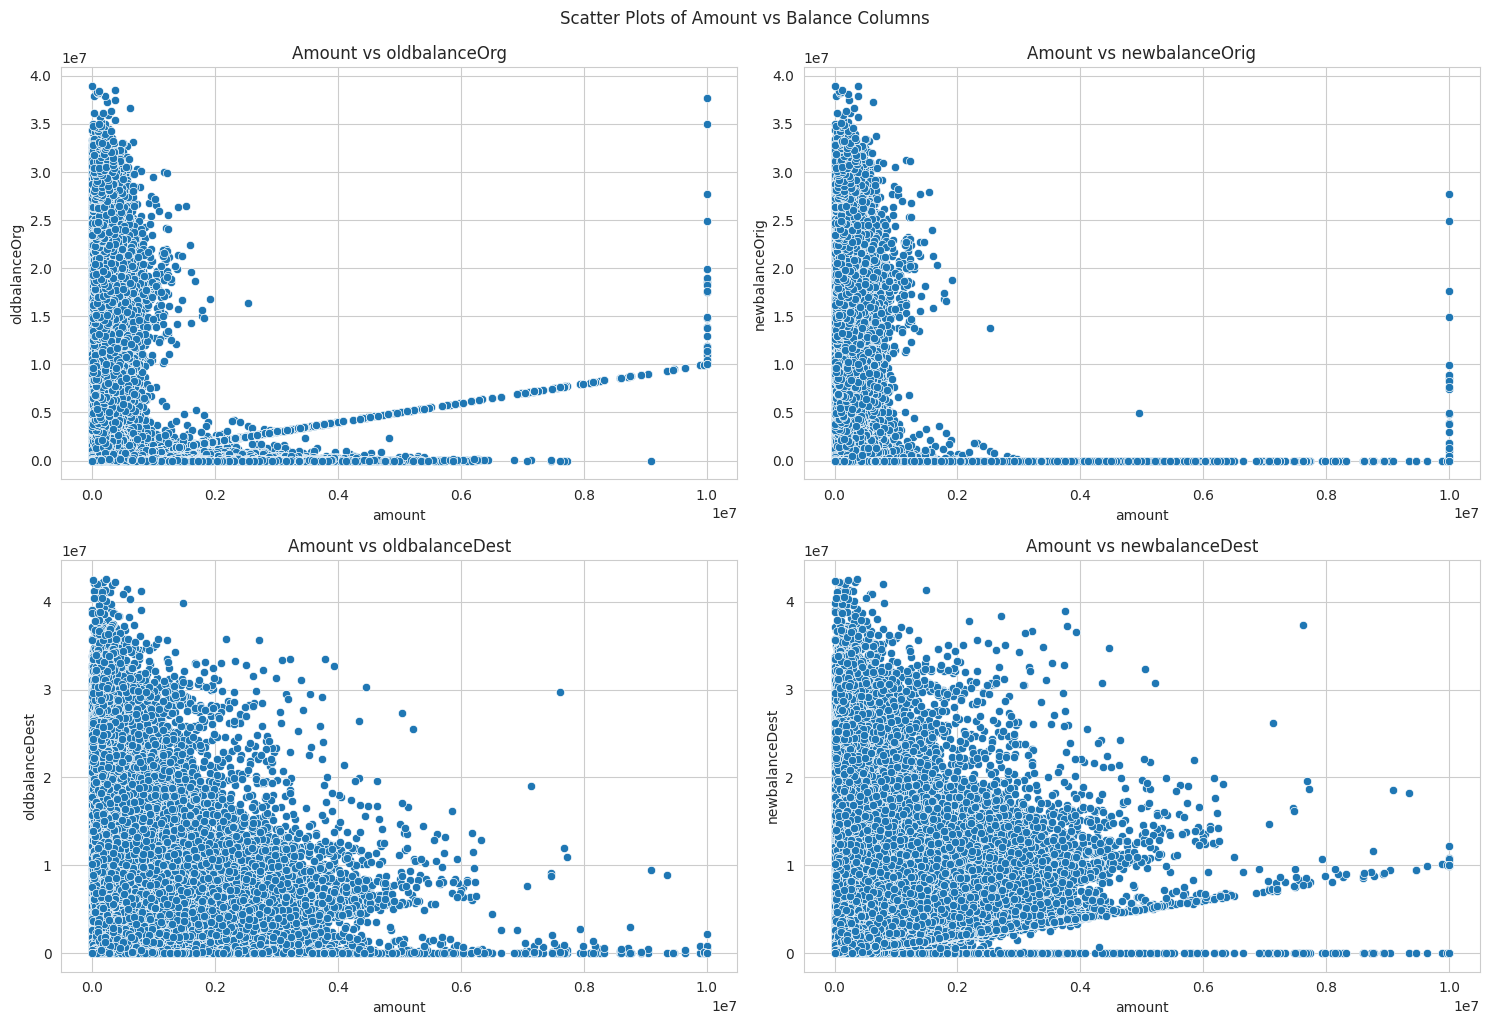

In [9]:
# Create scatter plots to examine the relationships between 'amount' and balance columns
balance_cols = ['oldbalanceOrg', 'newbalanceOrig', 'oldbalanceDest', 'newbalanceDest']
plt.figure(figsize=(15, 10))
for i, col in enumerate(balance_cols):
    plt.subplot(2, 2, i + 1)
    sns.scatterplot(x='amount', y=col, data=df)
    plt.title(f'Amount vs {col}')
plt.tight_layout()
plt.suptitle('Scatter Plots of Amount vs Balance Columns', y=1.02)
plt.show()

A heatmap of the correlation matrix for all numerical columns in df to visualize the relationships between all pairs of features.



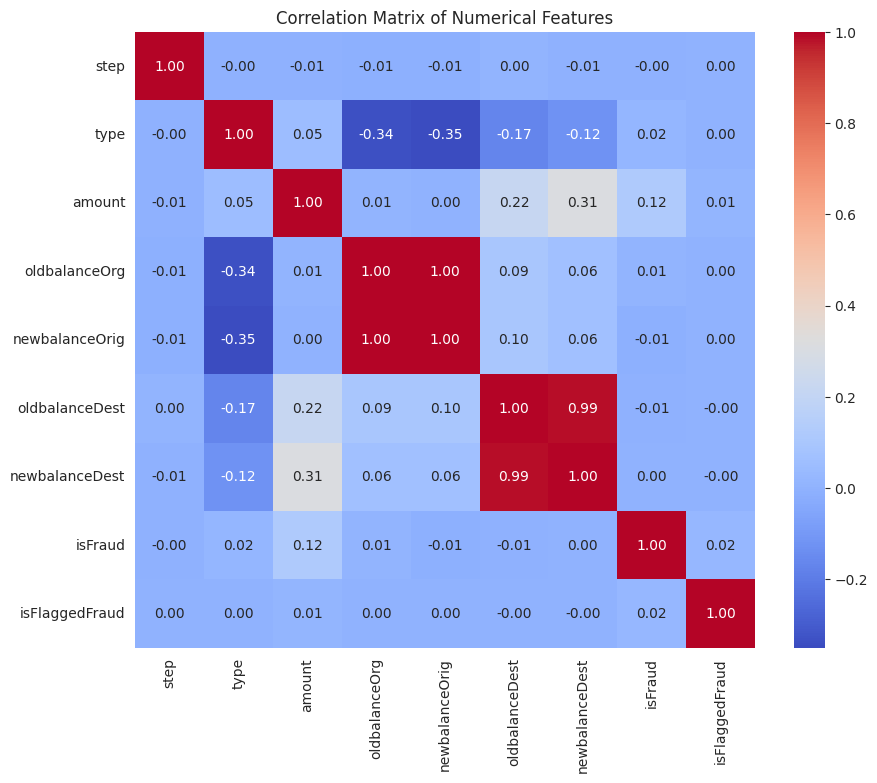

In [10]:
# Generate a heatmap of the correlation matrix
plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_cols].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

## Analyze statistics


In [11]:
# Calculate and display descriptive statistics for numerical columns
print("Descriptive Statistics for Numerical Columns:")
display(df.describe())

# Calculate and display the value counts for the target variable 'isFraud'
print("\nValue Counts for 'isFraud':")
display(df['isFraud'].value_counts())

# Display the percentage of fraudulent transactions
fraud_percentage = (df['isFraud'].sum() / df.shape[0]) * 100
print(f"\nPercentage of fraudulent transactions: {fraud_percentage:.2f}%")

Descriptive Statistics for Numerical Columns:


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
count,3.141518e+06,3.141518e+06,3.141518e+06,3.141518e+06,3.141518e+06,3.141518e+06,3.141518e+06,3.141518e+06,3.141518e+06
mean,1.291882e+02,1.704186e+00,1.582463e+05,8.403929e+05,8.619148e+05,9.964619e+05,1.103583e+06,8.483160e-04,3.183175e-07
std,7.796895e+01,1.346379e+00,2.677288e+05,2.901816e+06,2.938267e+06,2.302985e+06,2.385086e+06,2.911351e-02,5.641963e-04
min,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,3.900000e+01,1.000000e+00,1.271942e+04,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,1.550000e+02,1.000000e+00,7.673107e+04,1.456700e+04,0.000000e+00,1.389819e+05,2.255912e+05,0.000000e+00,0.000000e+00
75%,1.900000e+02,3.000000e+00,2.118680e+05,1.129070e+05,1.526885e+05,9.464243e+05,1.130111e+06,0.000000e+00,0.000000e+00
max,2.360000e+02,4.000000e+00,1.000000e+07,3.893942e+07,3.894623e+07,4.265577e+07,4.265577e+07,1.000000e+00,1.000000e+00



Value Counts for 'isFraud':


,count
isFraud,
0.0,3138853
1.0,2665



Percentage of fraudulent transactions: 0.08%


## Identify anomalies

I looked for outliers using visualizations like box plots or by examining extreme values.


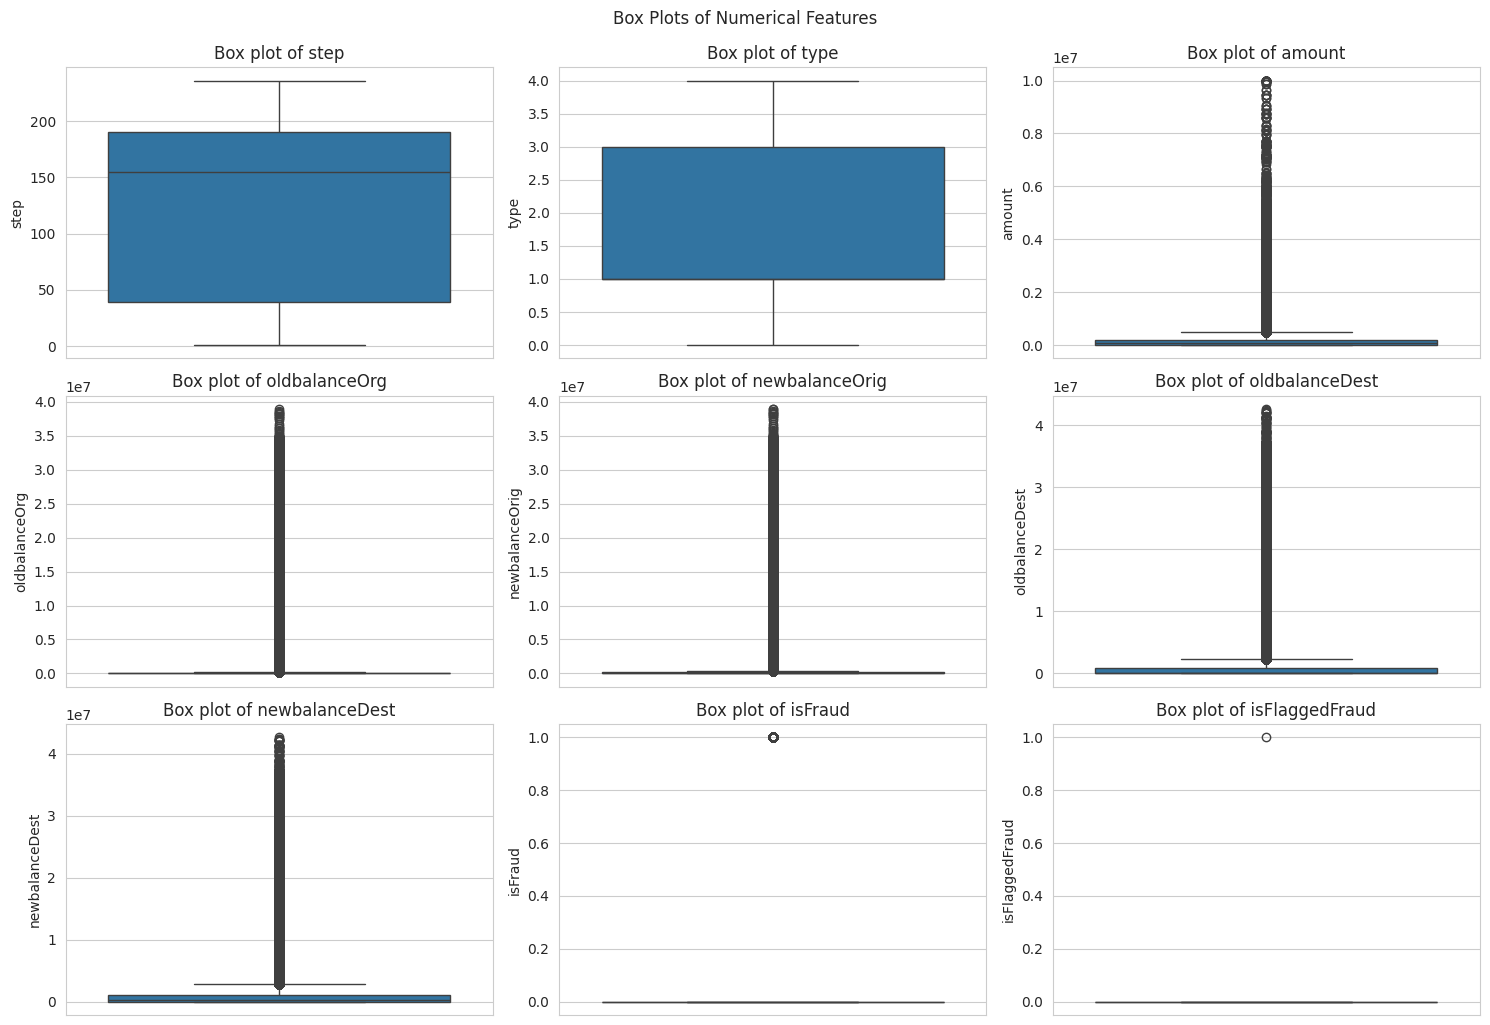

In [12]:
# Create box plots for numerical columns to identify outliers
numerical_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numerical_cols):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(y=df[col])
    plt.title(f'Box plot of {col}')
plt.tight_layout()
plt.suptitle('Box Plots of Numerical Features', y=1.02)
plt.show()

# Feature Engineering
I performed feature engineering on the dataset to create new features that might be relevant for fraud detection, handle outliers, and prepare the data for model training.

In [13]:
# Create a new feature called is_zero_balance_after_orig
df['is_zero_balance_after_orig'] = (df['newbalanceOrig'] == 0).astype(int)

# Create a new feature called is_zero_balance_after_dest
df['is_zero_balance_after_dest'] = (df['newbalanceDest'] == 0).astype(int)

# Create a new feature called orig_balance_diff
df['orig_balance_diff'] = df['oldbalanceOrg'] - df['newbalanceOrig']

# Create a new feature called dest_balance_diff
df['dest_balance_diff'] = df['oldbalanceDest'] - df['newbalanceDest']

# Display the first few rows of the DataFrame to show the newly created features
print("DataFrame with new features:")
display(df.head())

DataFrame with new features:


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud,is_zero_balance_after_orig,is_zero_balance_after_dest,orig_balance_diff,dest_balance_diff
0,1,3,9839.64,170136.0,160296.36,0.0,0.0,0.0,0.0,0,1,9839.64,0.0
1,1,3,1864.28,21249.0,19384.72,0.0,0.0,0.0,0.0,0,1,1864.28,0.0
2,1,4,181.00,181.0,0.00,0.0,0.0,1.0,0.0,1,1,181.00,0.0
3,1,1,181.00,181.0,0.00,21182.0,0.0,1.0,0.0,1,1,181.00,21182.0
4,1,3,11668.14,41554.0,29885.86,0.0,0.0,0.0,0.0,0,1,11668.14,0.0


In [15]:
# Separate the features (X) and the target variable (y)
X = df.drop('isFraud', axis=1)
y = df['isFraud']

# Initialize a StandardScaler object
scaler = StandardScaler()

# Fit and transform the features (X) using the scaler
X_scaled = scaler.fit_transform(X)

# Convert the scaled features back to a DataFrame for easier inspection
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)

# Display the first few rows of the scaled features DataFrame
print("Scaled Features:")
display(X_scaled.head())

Scaled Features:


,step,type,amount,oldbalanceOrg,newbalanceOrig,oldbalanceDest,newbalanceDest,isFlaggedFraud,is_zero_balance_after_orig,is_zero_balance_after_dest,orig_balance_diff,dest_balance_diff
0,-1.644093,0.962444,-0.836947,0.874579,0.452162,-0.720587,-0.743397,-0.000564,-1.137876,1.273915,0.242331,0.272298
1,-1.644093,0.962444,-0.890788,-0.505867,-0.505955,-0.720587,-0.743397,-0.000564,-1.137876,1.273915,0.180705,0.272298
2,-1.644093,1.705176,-0.902152,-0.701205,-0.637760,-0.720587,-0.743397,-0.000564,0.878830,1.273915,0.167699,0.272298
3,-1.644093,-0.523022,-0.902152,-0.701205,-0.637760,-0.695196,-0.743397,-0.000564,0.878830,1.273915,0.167699,0.326142
4,-1.644093,0.962444,-0.824603,-0.317604,-0.434554,-0.720587,-0.743397,-0.000564,-1.137876,1.273915,0.256460,0.272298


## Model Selection, Training & Evaluation

Train and evaluate Logistic Regression and Decision Tree models for fraud detection, considering class imbalance for Decision Tree.

### Split data into training and testing sets.


In [16]:
# Split the scaled data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Print the shapes of the resulting sets to verify the split
print("Shape of X_train:", X_train.shape)
print("Shape of X_test:", X_test.shape)
print("Shape of y_train:", y_train.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_train: (2513214, 12)
Shape of X_test: (628304, 12)
Shape of y_train: (2513214,)
Shape of y_test: (628304,)


In [17]:
# Instantiate a Logistic Regression model
logistic_model = LogisticRegression(random_state=42)

# Instantiate a Decision Tree Classifier model with class weight balancing
decision_tree_model = DecisionTreeClassifier(random_state=42, class_weight='balanced')

# Print the instantiated models to confirm
print("Logistic Regression Model:", logistic_model)
print("Decision Tree Model:", decision_tree_model)

Logistic Regression Model: LogisticRegression(random_state=42)
Decision Tree Model: DecisionTreeClassifier(class_weight='balanced', random_state=42)


### Train model



In [18]:
# Train the Logistic Regression model
print("Training Logistic Regression model...")
logistic_model.fit(X_train, y_train)
print("Logistic Regression model trained.")

# Train the Decision Tree model
print("Training Decision Tree model...")
decision_tree_model.fit(X_train, y_train)
print("Decision Tree model trained.")

Training Logistic Regression model...
Logistic Regression model trained.
Training Decision Tree model...
Decision Tree model trained.


### Evaluate the performance of the models using appropriate metrics for imbalanced datasets (e.g., precision, recall, F1-score).


In [19]:
# Make predictions on the test set using the trained models
y_pred_logistic = logistic_model.predict(X_test)
y_pred_decision_tree = decision_tree_model.predict(X_test)

# Evaluate the performance of the Logistic Regression model
accuracy_logistic = accuracy_score(y_test, y_pred_logistic)
precision_logistic = precision_score(y_test, y_pred_logistic)
recall_logistic = recall_score(y_test, y_pred_logistic)
f1_logistic = f1_score(y_test, y_pred_logistic)

# Print evaluation metrics for Logistic Regression
print("Logistic Regression Model Evaluation:")
print(f"  Accuracy: {accuracy_logistic:.4f}")
print(f"  Precision: {precision_logistic:.4f}")
print(f"  Recall: {recall_logistic:.4f}")
print(f"  F1-Score: {f1_logistic:.4f}")

# Evaluate the performance of the Decision Tree model
accuracy_decision_tree = accuracy_score(y_test, y_pred_decision_tree)
precision_decision_tree = precision_score(y_test, y_pred_decision_tree)
recall_decision_tree = recall_score(y_test, y_pred_decision_tree)
f1_decision_tree = f1_score(y_test, y_pred_decision_tree)

# Print evaluation metrics for Decision Tree
print("\nDecision Tree Model Evaluation:")
print(f"  Accuracy: {accuracy_decision_tree:.4f}")
print(f"  Precision: {precision_decision_tree:.4f}")
print(f"  Recall: {recall_decision_tree:.4f}")
print(f"  F1-Score: {f1_decision_tree:.4f}")

# Calculate and print confusion matrices
print("\nConfusion Matrix for Logistic Regression:")
display(confusion_matrix(y_test, y_pred_logistic))

print("\nConfusion Matrix for Decision Tree:")
display(confusion_matrix(y_test, y_pred_decision_tree))

Logistic Regression Model Evaluation:
  Accuracy: 0.9995
  Precision: 0.9482
  Recall: 0.4533
  F1-Score: 0.6134

Decision Tree Model Evaluation:
  Accuracy: 0.9997
  Precision: 0.8242
  Recall: 0.7771
  F1-Score: 0.8000

Confusion Matrix for Logistic Regression:


array([[627766,     13],
       [   287,    238]])


Confusion Matrix for Decision Tree:


array([[627692,     87],
       [   117,    408]])

## Model optimization and reporting.
I tuned the hyperparameters of the models to improve performance.


In [20]:
from sklearn.model_selection import RandomizedSearchCV

# Define a parameter grid for the Decision Tree model
param_dist = {
    'max_depth': [10, 20, 30, 40, 50, None],
    'min_samples_split': [2, 5, 10, 20],
    'min_samples_leaf': [1, 2, 4, 8],
    'criterion': ['gini', 'entropy']
}

# Initialize RandomizedSearchCV
# Using 'f1' as the scoring metric is suitable for imbalanced datasets
random_search = RandomizedSearchCV(decision_tree_model, param_distributions=param_dist, n_iter=10, cv=3, scoring='f1', random_state=42, n_jobs=-1)

# Fit RandomizedSearchCV to the training data
print("Starting Randomized Search for Decision Tree tuning...")
random_search.fit(X_train, y_train)
print("Randomized Search finished.")

# Print the best hyperparameters found
print("\nBest hyperparameters found:")
print(random_search.best_params_)

# Train a new Decision Tree model with the best hyperparameters
best_decision_tree_model = random_search.best_estimator_

# Evaluate the tuned Decision Tree model on the test set
y_pred_tuned_decision_tree = best_decision_tree_model.predict(X_test)

accuracy_tuned_decision_tree = accuracy_score(y_test, y_pred_tuned_decision_tree)
precision_tuned_decision_tree = precision_score(y_test, y_pred_tuned_decision_tree)
recall_tuned_decision_tree = recall_score(y_test, y_pred_tuned_decision_tree)
f1_tuned_decision_tree = f1_score(y_test, y_pred_tuned_decision_tree)

# Print evaluation metrics for the tuned Decision Tree
print("\nTuned Decision Tree Model Evaluation:")
print(f"  Accuracy: {accuracy_tuned_decision_tree:.4f}")
print(f"  Precision: {precision_tuned_decision_tree:.4f}")
print(f"  Recall: {recall_tuned_decision_tree:.4f}")
print(f"  F1-Score: {f1_tuned_decision_tree:.4f}")

# Compare performance to the untuned model
print("\nComparison with Untuned Decision Tree Model:")
print(f"  Untuned F1-Score: {f1_decision_tree:.4f}")
print(f"  Tuned F1-Score: {f1_tuned_decision_tree:.4f}")

# Decide whether to replace the untuned model
if f1_tuned_decision_tree > f1_decision_tree:
    print("\nTuned Decision Tree model shows improved F1-score. Replacing untuned model.")
    decision_tree_model = best_decision_tree_model
else:
    print("\nTuned Decision Tree model did not significantly improve F1-score. Keeping untuned model.")


Starting Randomized Search for Decision Tree tuning...
Randomized Search finished.

Best hyperparameters found:
{'min_samples_split': 5, 'min_samples_leaf': 1, 'max_depth': None, 'criterion': 'entropy'}

Tuned Decision Tree Model Evaluation:
  Accuracy: 0.9997
  Precision: 0.8004
  Recall: 0.8248
  F1-Score: 0.8124

Comparison with Untuned Decision Tree Model:
  Untuned F1-Score: 0.8000
  Tuned F1-Score: 0.8124

Tuned Decision Tree model shows improved F1-score. Replacing untuned model.


## Summary:

### Data Analysis Key Findings

* The dataset was successfully split into training (80%) and testing (20%) sets, resulting in 2,513,214 training samples and 628,304 testing samples, each with 12 features.
* Both Logistic Regression and Decision Tree models were selected and instantiated for fraud detection, with the Decision Tree using `class_weight='balanced'` to address class imbalance.
* Both models were successfully trained on the training data.
* Evaluation metrics for the Logistic Regression model on the test set were: Accuracy: 0.9995, Precision: 0.9482, Recall: 0.4533, F1-Score: 0.6134.
* Evaluation metrics for the untuned Decision Tree model on the test set were: Accuracy: 0.9997, Precision: 0.8242, Recall: 0.7771, F1-Score: 0.8000.
* Hyperparameter tuning for the Decision Tree using `RandomizedSearchCV` resulted in slightly improved performance, with the tuned model achieving an F1-Score of 0.8124 on the test set.
* The tuned Decision Tree model was selected as the preferred model due to its improved F1-score compared to the untuned version.

### Insights or Next Steps

* The Decision Tree model with balanced class weights and tuned hyperparameters demonstrates better performance in identifying fraudulent transactions compared to Logistic Regression, based on the F1-score.
* Further investigation could involve evaluating other models suitable for imbalanced data (e.g., Random Forest, Gradient Boosting) or exploring techniques like oversampling or undersampling to potentially improve performance further.